In [9]:
import os
import warnings
from pathlib import Path
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)
from calculate_completeness_fraction import validation_hist
from cross_match_catalogs import read_catalog, match_catalogs_img
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

# 1. L1 photometry results: (chip_id: 08, g band)

number of objects detected in CSST_MSC_MS_SCIE_20231022045923_20231022050153_10160000000_08_cat_L1.fits: 19791


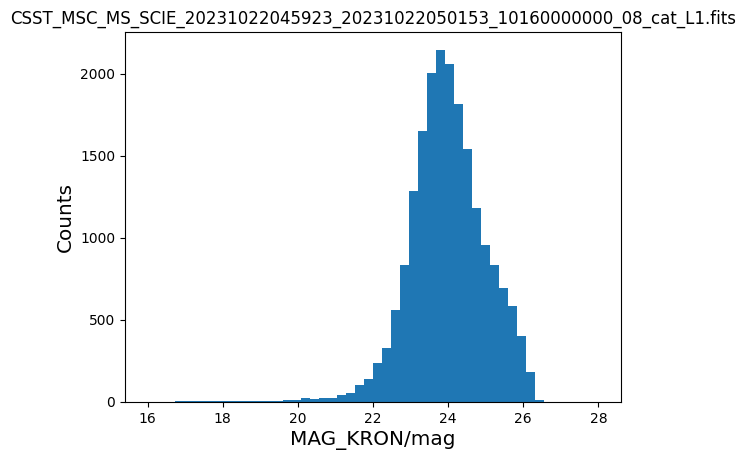

number of objects detected in CSST_MSC_MS_SCIE_20231022050559_20231022050829_10160000002_08_cat_L1.fits: 19134


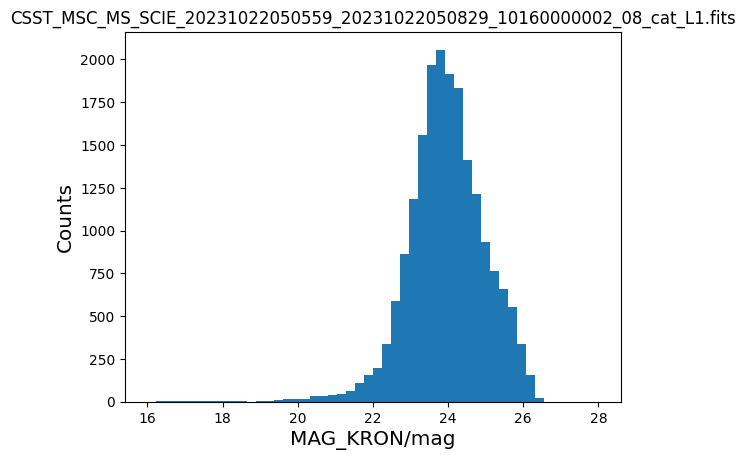

number of objects detected in CSST_MSC_MS_SCIE_20240601050406_20240601050636_10160000004_08_cat_L1.fits: 18187


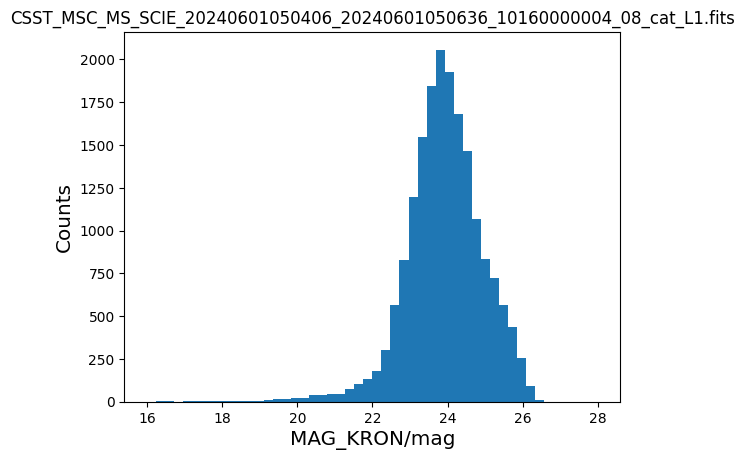

number of objects detected in CSST_MSC_MS_SCIE_20231022050241_20231022050511_10160000001_08_cat_L1.fits: 18697


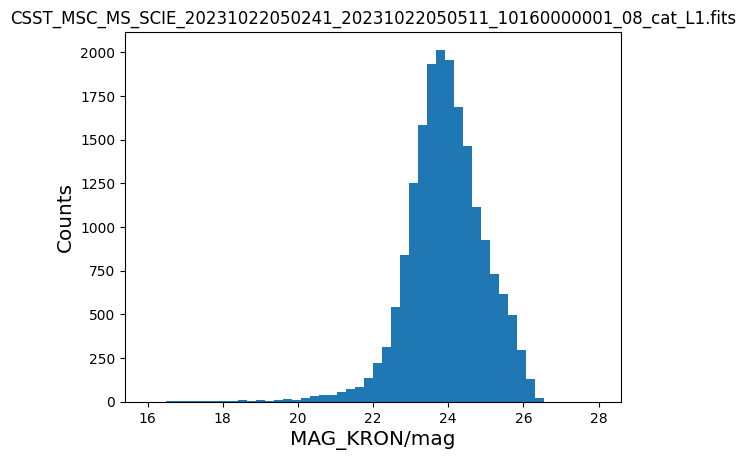

number of objects detected in CSST_MSC_MS_SCIE_20231125034322_20231125034552_10160000003_08_cat_L1.fits: 18870


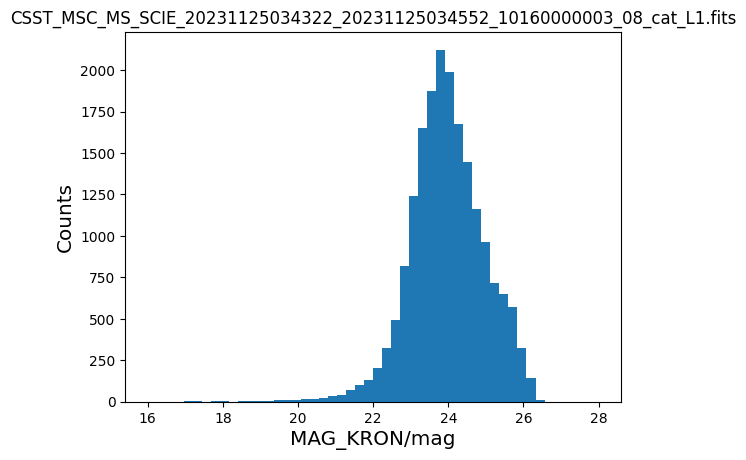

number of objects detected in CSST_MSC_MS_SCIE_20240615073556_20240615073826_10160000005_08_cat_L1.fits: 19325


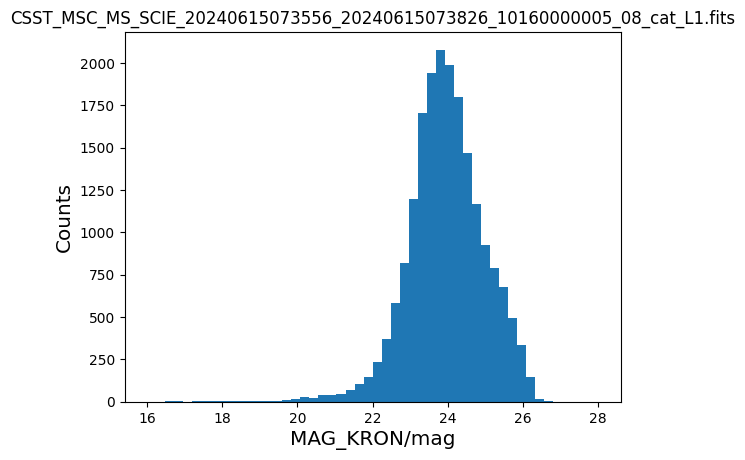

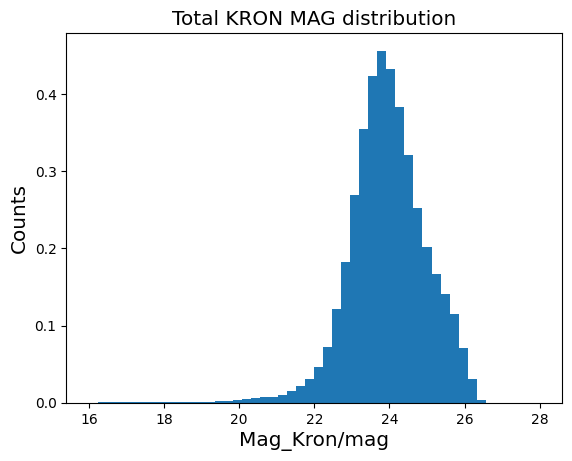

In [3]:
l1_output_dir = "/public/home/fangyuedong/project/test_photometry/"
chip_label = "08"
nbins = 50
bins = np.linspace(16., 28., nbins+1)

cat_path_list_l1 = glob(l1_output_dir + "*/*%s_cat*"%(chip_label))
mag_Kron_total_l1 = np.array([])
for cat_path in cat_path_list_l1:
    hdu = fits.open(cat_path)
    print("number of objects detected in %s: %d"%(os.path.basename(cat_path), len(hdu[1].data)))
    mag_Kron = hdu[1].data["Mag_Kron"]
    mag_Kron_total_l1 = np.append(mag_Kron_total_l1, mag_Kron)
    plt.figure()
    plt.hist(mag_Kron, bins=bins)
    plt.xlabel("MAG_KRON/mag", size='x-large')
    plt.ylabel("Counts", size='x-large')
    plt.title(os.path.basename(cat_path))
    plt.show()
    
plt.figure()
plt.hist(mag_Kron_total_l1, bins=bins, density=True)
plt.xlabel("Mag_Kron/mag", size='x-large')
plt.ylabel("Counts", size='x-large')
plt.title("Total KRON MAG distribution", size='x-large')
plt.show()

In [4]:
hdu = fits.open(cat_path_list_l1[0])
print("Column names of L1 processed photometry catalog", hdu[1].data.names)

Column names of L1 processed photometry catalog ['ID', 'ObsID', 'CCDNo', 'Filter', 'ObjID', 'X', 'XErr', 'Y', 'YErr', 'RA', 'RAErr', 'DEC', 'DECErr', 'A', 'AErr', 'B', 'BErr', 'PA', 'Flag', 'Flag_ISO', 'Flag_ISO_Num', 'FWHM', 'AB', 'E', 'Flux_Kron', 'FluxErr_Kron', 'Mag_Kron', 'MagErr_Kron', 'Radius_Kron', 'Sky', 'Flux_Aper1', 'FluxErr_Aper1', 'Mag_Aper1', 'MagErr_Aper1', 'Flux_Aper2', 'FluxErr_Aper2', 'Mag_Aper2', 'MagErr_Aper2', 'Flux_Aper3', 'FluxErr_Aper3', 'Mag_Aper3', 'MagErr_Aper3', 'Flux_Aper4', 'FluxErr_Aper4', 'Mag_Aper4', 'MagErr_Aper4', 'Flux_Aper5', 'FluxErr_Aper5', 'Mag_Aper5', 'MagErr_Aper5', 'Flux_Aper6', 'FluxErr_Aper6', 'Mag_Aper6', 'MagErr_Aper6', 'Flux_Aper7', 'FluxErr_Aper7', 'Mag_Aper7', 'MagErr_Aper7', 'Flux_Aper8', 'FluxErr_Aper8', 'Mag_Aper8', 'MagErr_Aper8', 'Flux_Aper9', 'FluxErr_Aper9', 'Mag_Aper9', 'MagErr_Aper9', 'Flux_Aper10', 'FluxErr_Aper10', 'Mag_Aper10', 'MagErr_Aper10', 'Flux_Aper11', 'FluxErr_Aper11', 'Mag_Aper11', 'MagErr_Aper11', 'Flux_Aper12', 'F

# 2. Properties of injected sources: (chip_id: 08, g band)

Colum names in injected truth catalog:  ['obj_ID', 'ID_chip', 'filter', 'xImage', 'yImage', 'ra', 'dec', 'ra_orig', 'dec_orig', 'z', 'mag', 'obj_type', 'pm_ra', 'pm_dec', 'RV', 'parallax']
CSST_MSC_MS_SCIE_20231022045923_20231022050153_10160000000_08_img_L1_injected.cat


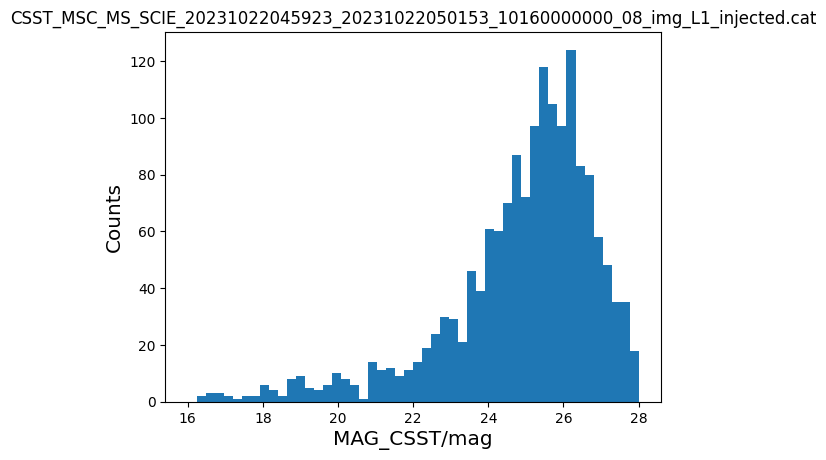

CSST_MSC_MS_SCIE_20231125034322_20231125034552_10160000003_08_img_L1_injected.cat


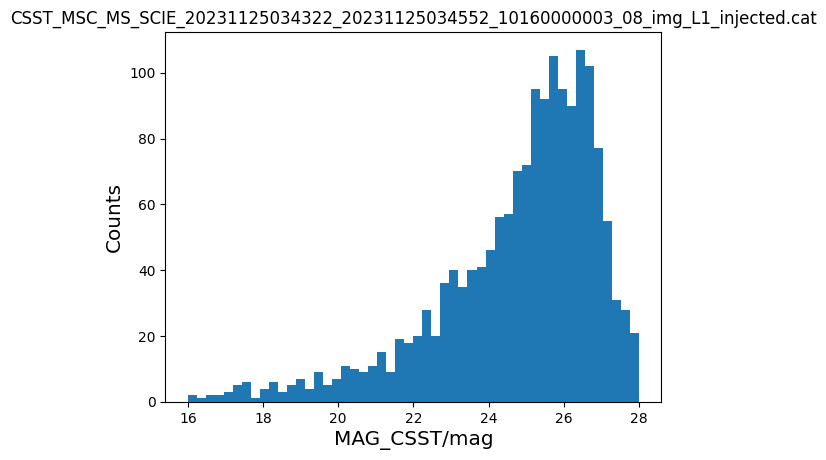

CSST_MSC_MS_SCIE_20240615073556_20240615073826_10160000005_08_img_L1_injected.cat


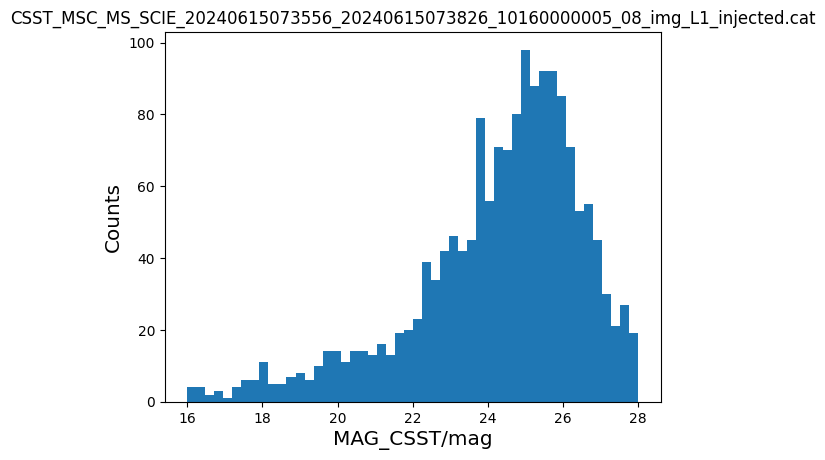

CSST_MSC_MS_SCIE_20231022050241_20231022050511_10160000001_08_img_L1_injected.cat


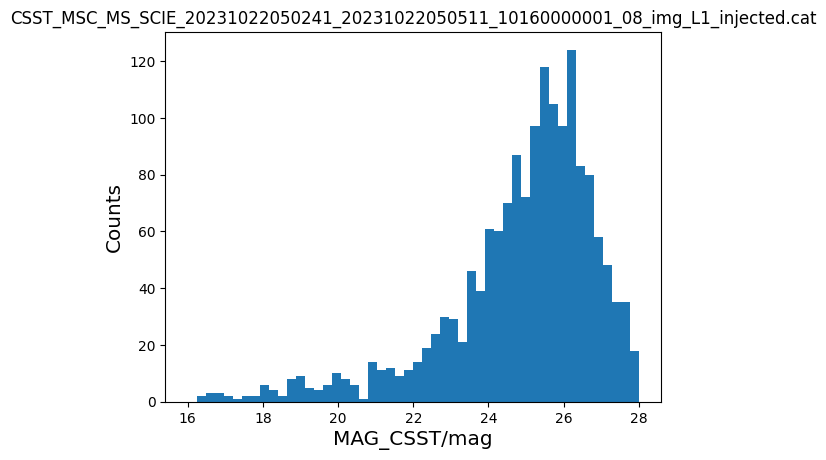

CSST_MSC_MS_SCIE_20231022050559_20231022050829_10160000002_08_img_L1_injected.cat


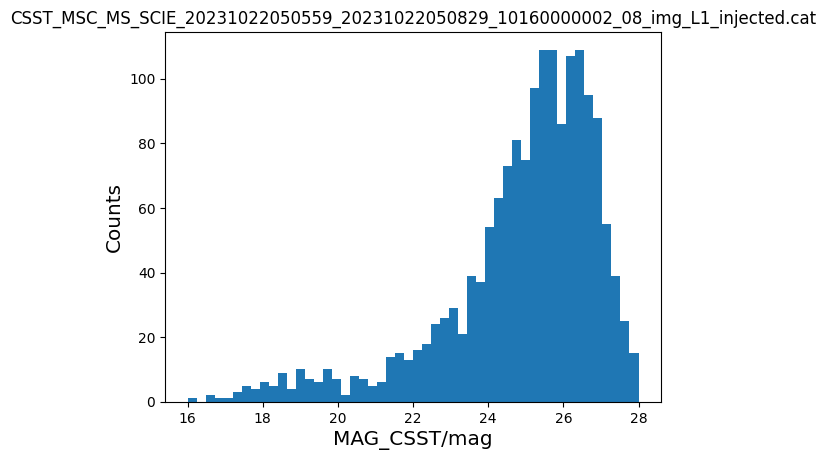

CSST_MSC_MS_SCIE_20240601050406_20240601050636_10160000004_08_img_L1_injected.cat


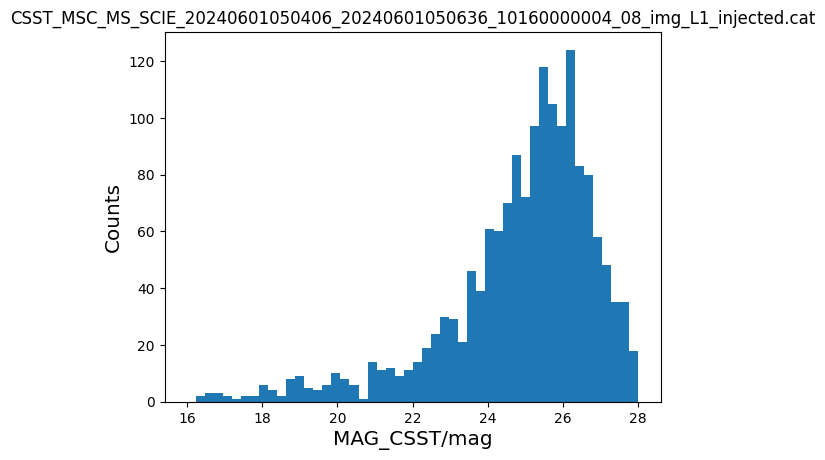

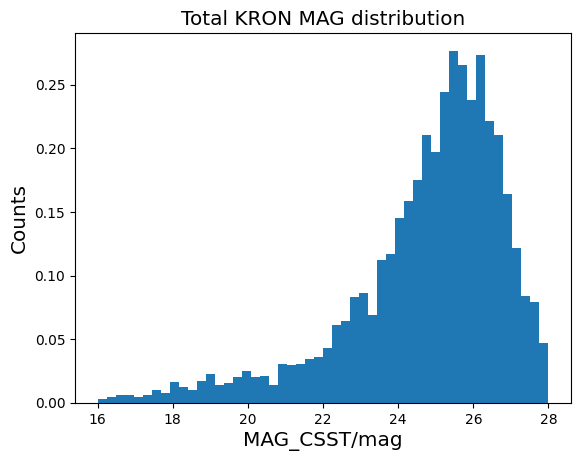

In [5]:
injected_truth_dir = "/public/home/fangyuedong/project/injected_50sqDeg_L1_outputs/"
chip_label = "08"
nbins = 50
bins = np.linspace(16., 28., nbins+1)

cat_path_list_injected_truth = glob(injected_truth_dir + "*/*_%s_*.cat*"%(chip_label))
mag_csst_total_injected_truth = np.array([])

data = ascii.read(cat_path_list_injected_truth[0])
print("Colum names in injected truth catalog: ", data.colnames)

for cat_path in cat_path_list_injected_truth:
    print(os.path.basename(cat_path))
    data = ascii.read(cat_path)
    mag_csst = data["mag"]
    mag_csst_total_injected_truth = np.append(mag_csst_total_injected_truth, mag_csst)
    plt.figure()
    plt.hist(mag_csst, bins=bins)
    plt.xlabel("MAG_CSST/mag", size='x-large')
    plt.ylabel("Counts", size='x-large')
    plt.title(os.path.basename(cat_path))
    plt.show()

plt.figure()
plt.hist(mag_csst_total_injected_truth, bins=bins, density=True)
plt.xlabel("MAG_CSST/mag", size='x-large')
plt.ylabel("Counts", size='x-large')
plt.title("Total KRON MAG distribution", size='x-large')
plt.show()

# 3. L1 photometry results on injected images: (chip_id: 08, g band)

number of objects detected in CSST_MSC_MS_SCIE_20231022050241_20231022050511_10160000001_08_cat_L1_injected.fits: 19024


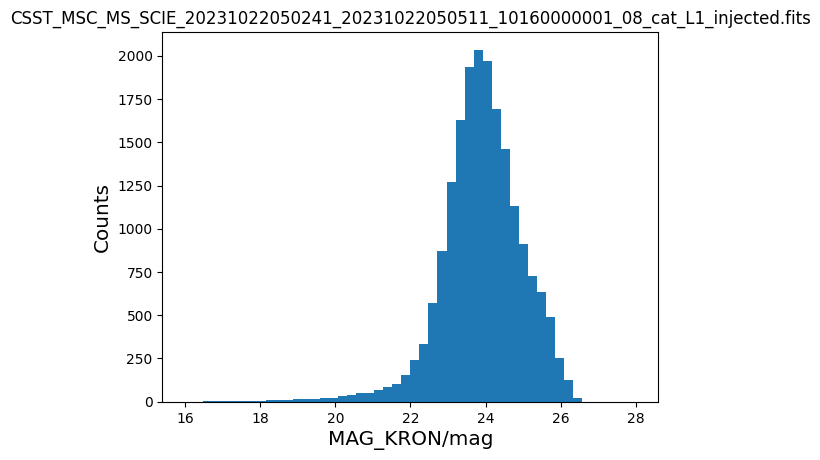

number of objects detected in CSST_MSC_MS_SCIE_20231125034322_20231125034552_10160000003_08_cat_L1_injected.fits: 19206


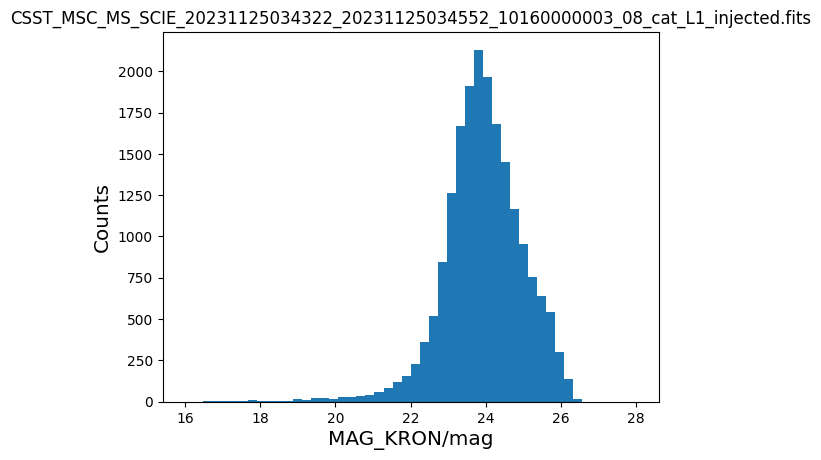

number of objects detected in CSST_MSC_MS_SCIE_20240615073556_20240615073826_10160000005_08_cat_L1_injected.fits: 19614


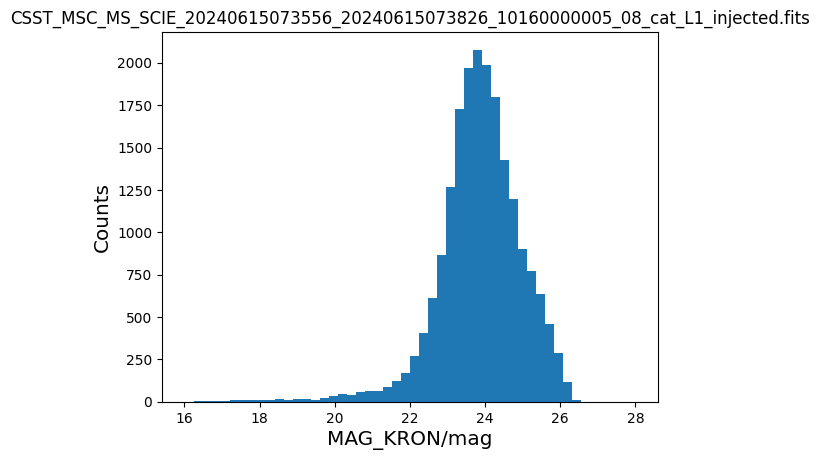

number of objects detected in CSST_MSC_MS_SCIE_20231022045923_20231022050153_10160000000_08_cat_L1_injected.fits: 20105


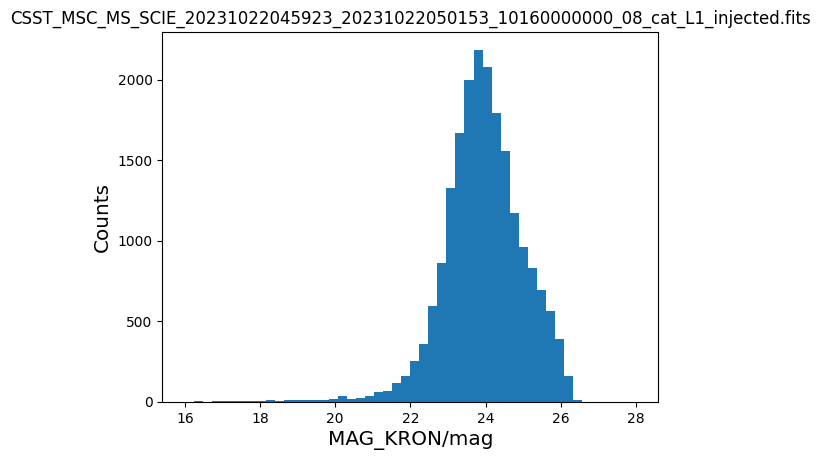

number of objects detected in CSST_MSC_MS_SCIE_20231022050559_20231022050829_10160000002_08_cat_L1_injected.fits: 19428


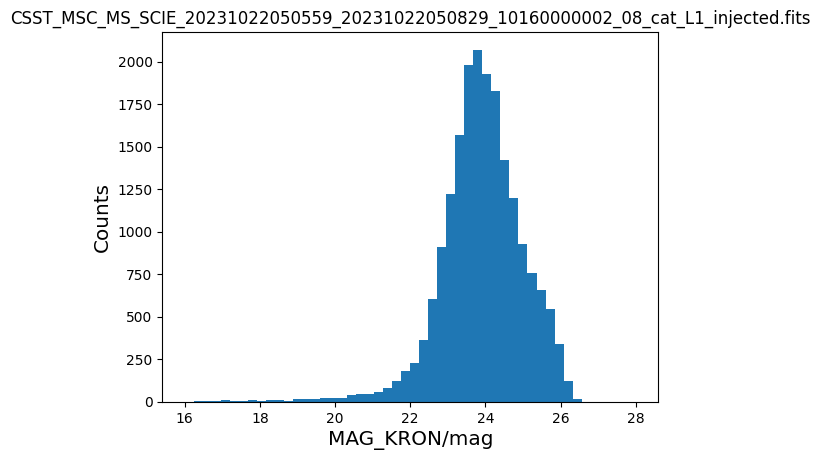

number of objects detected in CSST_MSC_MS_SCIE_20240601050406_20240601050636_10160000004_08_cat_L1_injected.fits: 18523


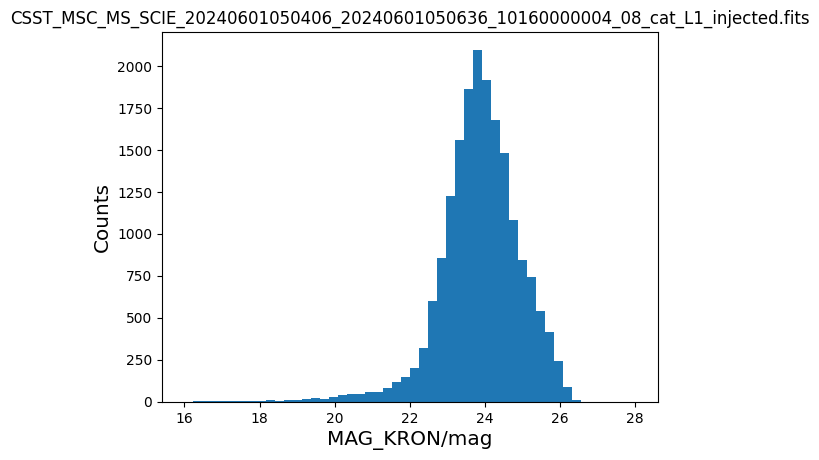

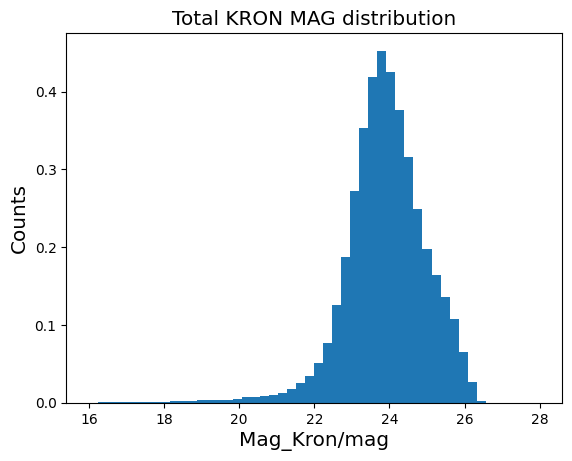

In [6]:
injected_l1_output_dir = "/public/home/fangyuedong/project/processed_injected_50sqDeg_L1_outputs/"
chip_label = "08"
nbins = 50
bins = np.linspace(16., 28., nbins+1)

cat_path_list_injected_l1 = glob(injected_l1_output_dir + "*/*%s_cat*"%(chip_label))
mag_Kron_total_injected_l1 = np.array([])
for cat_path in cat_path_list_injected_l1:
    hdu = fits.open(cat_path)
    print("number of objects detected in %s: %d"%(os.path.basename(cat_path), len(hdu[1].data)))
    mag_Kron = hdu[1].data["Mag_Kron"]
    mag_Kron_total_injected_l1 = np.append(mag_Kron_total_injected_l1, mag_Kron)
    plt.figure()
    plt.hist(mag_Kron, bins=bins)
    plt.xlabel("MAG_KRON/mag", size='x-large')
    plt.ylabel("Counts", size='x-large')
    plt.title(os.path.basename(cat_path))
    plt.show()
    
plt.figure()
plt.hist(mag_Kron_total_injected_l1, bins=bins, density=True)
plt.xlabel("Mag_Kron/mag", size='x-large')
plt.ylabel("Counts", size='x-large')
plt.title("Total KRON MAG distribution", size='x-large')
plt.show()

# 4. Matching and complteness checking

In [7]:
def create_hist_figure(counts, counts_detected, bins, name="val", output_dir='./', fig_name='detected_counts.png', save_figure=False):
    plt.figure()
    plt.stairs(counts, bins, color='r', label='TU objects')
    plt.stairs(counts_detected, bins, color='g', label='Detected')
    plt.xlabel(name, size='x-large')
    plt.title("Counts")
    plt.legend(loc='upper right', fancybox=True)
    if save_figure:
        fig_name = os.path.join(output_dir, fig_name)
        plt.savefig(fig_name)
        
def create_fraction_figure(counts, counts_detected, bins, name='val', output_dir='./', fig_name="completeness_fraction.png", save_figure=False):
    fraction = counts_detected / counts
    fraction[np.where(np.isnan(fraction))[0]] = 0.
    plt.figure()
    plt.stairs(fraction, bins, color='r', label='completeness fraction')
    plt.xlabel(name, size='x-large')
    plt.title("Completeness Fraction")
    if save_figure:
        fig_name = os.path.join(output_dir, fig_name)
        plt.savefig(fig_name)
    return fraction

Injected truth catalog:  CSST_MSC_MS_SCIE_20231022045923_20231022050153_10160000000_08_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20231022045923_20231022050153_10160000000_08_cat_L1_injected.fits
number of matched sources =  472
Injected truth catalog:  CSST_MSC_MS_SCIE_20231125034322_20231125034552_10160000003_08_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20231125034322_20231125034552_10160000003_08_cat_L1_injected.fits
number of matched sources =  510
Injected truth catalog:  CSST_MSC_MS_SCIE_20240615073556_20240615073826_10160000005_08_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20240615073556_20240615073826_10160000005_08_cat_L1_injected.fits
number of matched sources =  537
Injected truth catalog:  CSST_MSC_MS_SCIE_20231022050241_20231022050511_10160000001_08_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20231022050241_20231022050511_10160000001_08_cat_L1_injected.fits
numbe

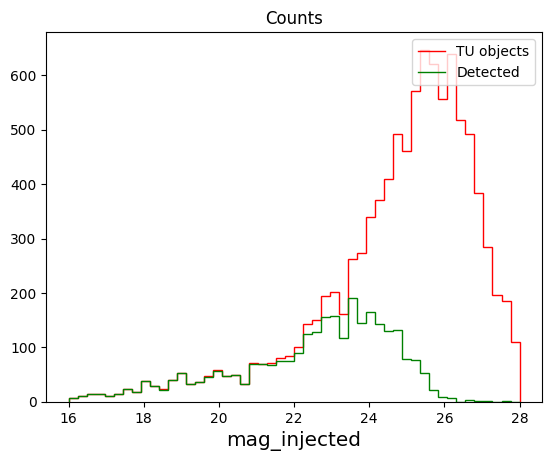

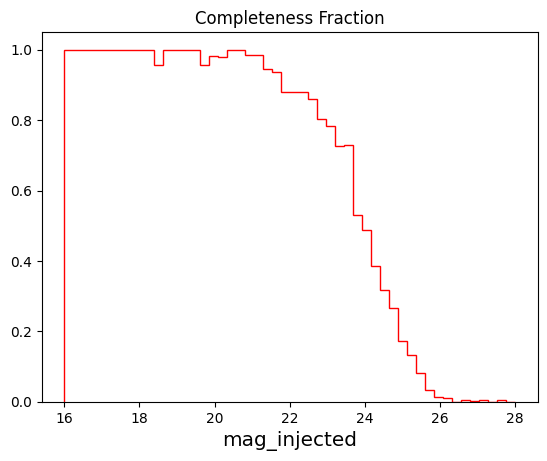

In [8]:
injected_truth_dir = "/public/home/fangyuedong/project/injected_50sqDeg_L1_outputs/"
injected_l1_output_dir = "/public/home/fangyuedong/project/processed_injected_50sqDeg_L1_outputs/"

chip_label = "08"
nbins = 50
bins = np.linspace(16., 28., nbins+1)

counts = np.zeros(nbins)
counts_detected = np.zeros(nbins)

cat_path_list_injected_truth = glob(injected_truth_dir + "*/*_%s_*.cat*"%(chip_label))
cat_path_list_injected_l1 = glob(injected_l1_output_dir + "*/*%s_cat*"%(chip_label))

for cat_path_injected_truth in cat_path_list_injected_truth:
    print("Injected truth catalog: ", os.path.basename(cat_path_injected_truth))
    obs_id = cat_path_injected_truth.split('/')[-2]
    data = ascii.read(cat_path_injected_truth)
    x_truth = data["xImage"]
    y_truth = data["yImage"]
    mag_truth = data["mag"]
    
    cat_path_injected_l1 = os.path.join(injected_l1_output_dir,
                                        obs_id,
                                        os.path.basename(cat_path_injected_truth).replace("img", "cat").replace(".cat", ".fits"))
    print("L1 processed photometry catalog: ", os.path.basename(cat_path_injected_l1))
    hdu = fits.open(cat_path_injected_l1)
    x_measure = hdu[1].data["X"]
    y_measure = hdu[1].data["Y"]
    mag_measure = hdu[1].data["Mag_Kron"]
    
    idx1, _, = match_catalogs_img(x1=x_truth, y1=y_truth, x2=x_measure, y2=y_measure)
    
    counts_temp, counts_detected_temp, _ = validation_hist(val=mag_truth, 
                                                           idx=idx1, 
                                                           name="mag_injected", 
                                                           bins=bins, 
                                                           output_dir='./', 
                                                           create_figure=False)
    counts += counts_temp
    counts_detected += counts_detected_temp

create_hist_figure(counts, counts_detected, bins, "mag_injected", './')
plt.show()
fraction = create_fraction_figure(counts, counts_detected, bins, 'mag_injected', './')
plt.show()